In [221]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)

df= pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# What We Will Do: 
#### 1. treat null values
#### 2. encode the dependent features 
#### 3. scaling numerical variables
#### 4. Feature Importance
#### 5. Models We Will Use

In [222]:
categorical_features =  [feature for feature in df.columns if df[feature].dtypes == 'O']
ts = ["Education", "EnvironmentSatisfaction","JobLevel",
"StockOptionLevel",
"JobSatisfaction","RelationshipSatisfaction","WorkLifeBalance","PerformanceRating"]

ordinal_features = ts


numerical_features =    [feature for feature in df.columns if df[feature].dtypes != 'O' and feature not in categorical_features + ts]

df[numerical_features].head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobInvolvement,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,94,3,5993,19479,8,11,80,8,0,6,4,0,5
1,49,279,8,1,2,61,2,5130,24907,1,23,80,10,3,10,7,1,7
2,37,1373,2,1,4,92,2,2090,2396,6,15,80,7,3,0,0,0,0
3,33,1392,3,1,5,56,3,2909,23159,1,11,80,8,3,8,7,3,0
4,27,591,2,1,7,40,3,3468,16632,9,12,80,6,3,2,2,2,2


In [223]:
for col in ordinal_features:
    if col in categorical_features:
        categorical_features.remove(col)

In [224]:
df[categorical_features]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


#### these are the nominal categorical features

# 1 .Null Values

In [225]:
null_col = [col for col in df.columns if df[col].isnull().sum() >= 1]

for feature in null_col:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

#### it looks like there are not null values now we will move to search for low variance values 

# 2.Encode the Dependent Feature

In [226]:

cleanup_nums = {"Attrition":{"Yes": 1, "No": 0}}

df = df.replace(cleanup_nums)
df['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

# 3.Escaling Numerical Variables

In [227]:
df[numerical_features].head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobInvolvement,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,94,3,5993,19479,8,11,80,8,0,6,4,0,5
1,49,279,8,1,2,61,2,5130,24907,1,23,80,10,3,10,7,1,7
2,37,1373,2,1,4,92,2,2090,2396,6,15,80,7,3,0,0,0,0
3,33,1392,3,1,5,56,3,2909,23159,1,11,80,8,3,8,7,3,0
4,27,591,2,1,7,40,3,3468,16632,9,12,80,6,3,2,2,2,2


In [228]:

from sklearn.preprocessing import StandardScaler
object = StandardScaler()

df[numerical_features] = object.fit_transform(df[numerical_features])


df[numerical_features].head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobInvolvement,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,0.0,-1.701283,1.383138,0.379672,-0.108350,0.726020,2.125136,-1.150554,0.0,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,0.0,-1.699621,-0.240677,-1.026167,-0.291719,1.488876,-0.678049,2.129306,0.0,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,0.0,-1.696298,1.284725,-1.026167,-0.937654,-1.674841,1.324226,-0.057267,0.0,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,0.0,-1.694636,-0.486709,0.379672,-0.763634,1.243211,-0.678049,-1.150554,0.0,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,0.0,-1.691313,-1.274014,0.379672,-0.644858,0.325900,2.525591,-0.877232,0.0,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


In [229]:
df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1})
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['Attrition'] = df['Attrition'].replace({'No':0,'Yes':1})

#encode categorical columns which are ordinal, use labelEncoding
cat_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for col in cat_cols:
    map_dict = {k:i for i, k in enumerate(df[col].value_counts().index,0)}
    df[col] = df[col].map(map_dict)

In [230]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,0,0.742527,1,-1.010909,2,0,0.0,-1.701283,2,1,1.383138,0.379672,2,0,4,1,-0.108350,0.726020,2.125136,Y,1,-1.150554,3,1,0.0,0,-0.421642,-2.171982,1,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,0,-0.147150,1,0,0.0,-1.699621,3,0,-0.240677,-1.026167,2,1,2,0,-0.291719,1.488876,-0.678049,Y,0,2.129306,4,4,0.0,1,-0.164511,0.155707,3,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,0,1.414363,0,-0.887515,2,4,0.0,-1.696298,4,0,1.284725,-1.026167,1,2,3,1,-0.937654,-1.674841,1.324226,Y,1,-0.057267,3,2,0.0,0,-0.550208,0.155707,3,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,0,-0.764121,4,0,0.0,-1.694636,4,1,-0.486709,0.379672,1,1,3,0,-0.763634,1.243211,-0.678049,Y,1,-1.150554,3,3,0.0,0,-0.421642,0.155707,3,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,0,-0.524295,0,-0.887515,1,1,0.0,-1.691313,1,0,-1.274014,0.379672,1,2,2,0,-0.644858,0.325900,2.525591,Y,0,-0.877232,3,4,0.0,1,-0.678774,0.155707,3,-0.817734,-0.615492,-0.058285,-0.595227


# 4. Feature Importance

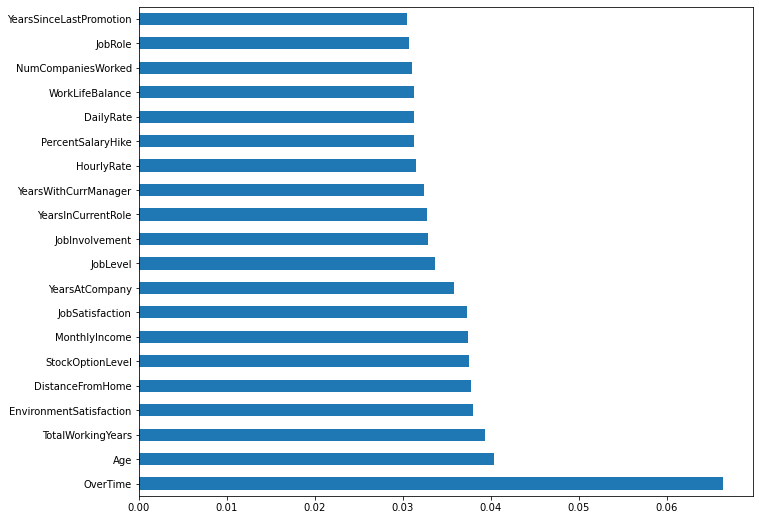

In [231]:
 
from sklearn.ensemble import ExtraTreesClassifier

df.drop('Over18',axis=1,inplace=True)

extra_tree = ExtraTreesClassifier()
x = df.drop(['Attrition'],axis=1)

y = df['Attrition']
extra_tree.fit(x,y)

feat_importance = extra_tree.feature_importances_


#plotting a feature importance
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)

feat_imp.nlargest(20).plot(kind='barh')
plt.show()


In [232]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,0,0.742527,1,-1.010909,2,0,0.0,-1.701283,2,1,1.383138,0.379672,2,0,4,1,-0.108350,0.726020,2.125136,1,-1.150554,3,1,0.0,0,-0.421642,-2.171982,1,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,0,-0.147150,1,0,0.0,-1.699621,3,0,-0.240677,-1.026167,2,1,2,0,-0.291719,1.488876,-0.678049,0,2.129306,4,4,0.0,1,-0.164511,0.155707,3,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,0,1.414363,0,-0.887515,2,4,0.0,-1.696298,4,0,1.284725,-1.026167,1,2,3,1,-0.937654,-1.674841,1.324226,1,-0.057267,3,2,0.0,0,-0.550208,0.155707,3,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,0,-0.764121,4,0,0.0,-1.694636,4,1,-0.486709,0.379672,1,1,3,0,-0.763634,1.243211,-0.678049,1,-1.150554,3,3,0.0,0,-0.421642,0.155707,3,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,0,-0.524295,0,-0.887515,1,1,0.0,-1.691313,1,0,-1.274014,0.379672,1,2,2,0,-0.644858,0.325900,2.525591,0,-0.877232,3,4,0.0,1,-0.678774,0.155707,3,-0.817734,-0.615492,-0.058285,-0.595227


#### as you can see the outliers of the numerical features have been removed
#### now I will try to do standard scaler on the data


# Model We Will Use
- ### Logistic Regression
- ### Nearest Neighbor
- ### Naive Bayes
- ### Support Vector Machines
- ### Decision Trees

In [233]:
cleanup_nums = {"Gender": {"Male": 1, "Female": 0}}

df = df.replace(cleanup_nums)

In [234]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,0,0.742527,1,-1.010909,2,0,0.0,-1.701283,2,1,1.383138,0.379672,2,0,4,1,-0.108350,0.726020,2.125136,1,-1.150554,3,1,0.0,0,-0.421642,-2.171982,1,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,0,-0.147150,1,0,0.0,-1.699621,3,0,-0.240677,-1.026167,2,1,2,0,-0.291719,1.488876,-0.678049,0,2.129306,4,4,0.0,1,-0.164511,0.155707,3,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,0,1.414363,0,-0.887515,2,4,0.0,-1.696298,4,0,1.284725,-1.026167,1,2,3,1,-0.937654,-1.674841,1.324226,1,-0.057267,3,2,0.0,0,-0.550208,0.155707,3,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,0,-0.764121,4,0,0.0,-1.694636,4,1,-0.486709,0.379672,1,1,3,0,-0.763634,1.243211,-0.678049,1,-1.150554,3,3,0.0,0,-0.421642,0.155707,3,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,0,-0.524295,0,-0.887515,1,1,0.0,-1.691313,1,0,-1.274014,0.379672,1,2,2,0,-0.644858,0.325900,2.525591,0,-0.877232,3,4,0.0,1,-0.678774,0.155707,3,-0.817734,-0.615492,-0.058285,-0.595227


In [235]:
df.shape

(1470, 34)

In [236]:
X = df.drop(['Attrition'],axis=1)

y = df['Attrition']

In [237]:
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

## Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
log_regression = LogisticRegression()
#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
log_y_pred = log_regression.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, log_y_pred))



Accuracy: 0.8707482993197279


## KNN Classifier

In [240]:
from sklearn.neighbors import KNeighborsClassifier

In [241]:
k_neighbors = KNeighborsClassifier(n_neighbors=11)

k_neighbors.fit(X_train,y_train)

k_y_pred = k_neighbors.predict(X_test)


print("Accuracy",metrics.accuracy_score(y_test,k_y_pred))

Accuracy 0.8480725623582767


## Decision Tree Classifier

In [242]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
clf = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 7,
 splitter='random',random_state=3)

## SEACH HOW TO MAKE THIS MODEL MORE ACCURATE
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=3,
                       splitter='random')

In [244]:
clf.feature_importances_

array([0.08374222, 0.0066213 , 0.01086252, 0.0279329 , 0.        ,
       0.01882783, 0.00770145, 0.        , 0.011521  , 0.08283909,
       0.03618387, 0.02371669, 0.        , 0.08595275, 0.06263631,
       0.05918557, 0.        , 0.01630726, 0.        , 0.00835711,
       0.1100163 , 0.01579967, 0.02403168, 0.05377745, 0.        ,
       0.06271472, 0.01042725, 0.01350592, 0.03611781, 0.02255121,
       0.04053746, 0.02820392, 0.03992874])

In [245]:
imporants_df = pd.DataFrame(clf.feature_importances_,index=X.columns)

In [246]:
tree_y_pred = clf.predict(X_test)

In [247]:
print("Accuracy",metrics.accuracy_score(y_test,tree_y_pred))

Accuracy 0.8208616780045351


## Random Forest Classifier

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
forest = RandomForestClassifier(max_depth=2, random_state=0)
forest.fit(X_train,y_train)
forest_pred = forest.predict(X_test)

print("Accuracy",metrics.accuracy_score(y_test,forest_pred))

Accuracy 0.8412698412698413


### as we can see there is a bigger area under the curve of the decision tree 
### classifier, therefore its a good idea to use it.

# GridSearchCV for model tuning   

## Decision Tree

In [250]:
from sklearn.model_selection import GridSearchCV

In [251]:
parameters = {'criterion':("gini","entropy"),
              'max_depth': [2,4,5,7,10,11,15],
          'min_samples_split':[4,5,3,6,8],
              'min_samples_leaf': [13,14,15,16,20],
              'splitter':('best','random')}

grid_search = GridSearchCV(clf,parameters)
grid_search.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                              random_state=3,
                                              splitter='random'),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 5, 7, 10, 11, 15],
                         'min_samples_leaf': [13, 14, 15, 16, 20],
                         'min_samples_split': [4, 5, 3, 6, 8],
                         'splitter': ('best', 'random')})

In [252]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 15,
 'min_samples_split': 4,
 'splitter': 'best'}

In [253]:
clf = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 7,
 min_samples_leaf=14,
 min_samples_split=4,
 splitter='random',random_state=3)

## SEACH HOW TO MAKE THIS MODEL MORE ACCURATE
clf.fit(X_train,y_train)
imporants_df = pd.DataFrame(clf.feature_importances_,index=X.columns)
tree_y_pred = clf.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test,tree_y_pred))

Accuracy 0.8344671201814059


# Gradient Boosting Classifier 

In [257]:
from sklearn.ensemble import GradientBoostingClassifier
rf = GradientBoostingClassifier(max_features = 0.7, learning_rate = 0.3)

In [258]:
from sklearn.metrics import accuracy_score,classification_report
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    print('_________________________Model Performance_________________________\n\n')
    print('Accuracy = {:0.2f}%.'.format(accuracy * 100))
    print(classification_report(test_labels, predictions))
    return accuracy

In [259]:
params = {
    'max_depth': [3,5,6,8,10,12],
    'min_samples_leaf': [2,5,10,20],
    'n_estimators': [2,5,10,15,25]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv =2,
                           verbose=1, scoring="accuracy")

grid_model=grid_search.fit(X_train, y_train)
rf_best = grid_search.best_estimator_

print("\nBest Model: ",rf_best)

print("\nGridSerchCV Model Score: {:0.2f}%." .format(grid_search.best_score_*100))

grid_accuracy = evaluate(rf_best,  X_test, y_test)

#print('Time elapsed {}'.format(time.process_time() - start))


Fitting 2 folds for each of 120 candidates, totalling 240 fits

Best Model:  GradientBoostingClassifier(learning_rate=0.3, max_features=0.7,
                           min_samples_leaf=20, n_estimators=15)

GridSerchCV Model Score: 86.88%.
_________________________Model Performance_________________________


Accuracy = 86.85%.
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       371
           1       0.71      0.29      0.41        70

    accuracy                           0.87       441
   macro avg       0.80      0.63      0.67       441
weighted avg       0.85      0.87      0.84       441



In [268]:
### TRY THIS SAME THING BUT WITH LOGISTIC REGRESSION 

boost =  GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv =2,
                           verbose=1, scoring="accuracy")


## Voting Classifier

In [269]:
from sklearn.ensemble import VotingClassifier  #TODO: RESEARCH THIS

In [272]:
eclf1 = VotingClassifier(estimators=[
    ('lr', log_regression), ('gradientboostclass', boost)], voting='hard')

eclf1.fit(X,y)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('gradientboostclass',
                              GridSearchCV(cv=2,
                                           estimator=GradientBoostingClassifier(learning_rate=0.3,
                                                                                max_features=0.7),
                                           param_grid={'max_depth': [3, 5, 6, 8,
                                                                     10, 12],
                                                       'min_samples_leaf': [2,
                                                                            5,
                                                                            10,
                                                                            20],
                                                       'n_estimators': [2, 5,
                                                                        

In [273]:
voting_pred = eclf1.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, voting_pred))



Accuracy: 0.8866213151927438


best model so far (voting classifier with gridsearchcv, and logistic regression)